Facial Expression Recognition Coursework by Daniel Tiboah Addo

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score , confusion_matrix  , roc_curve
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizer_v2.adam import Adam
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA


K-Nearest Neighbour Classifier From Scratch - FIRST CLASSIFIER

In [2]:
class KnnClassification_Method:

    def __init__(self,num_neighbors): #knn is the number of nearest neighbors
        self.y_train = None
        self.x_train = None
        self.num_neighbors = num_neighbors

    def fit_KnnAlgorithm(self,x,y): #fit the knn algorithm
        self.x_train = x #training data
        self.y_train = y #training targets

    def predict_KnnAlgorithm(self,x_test:list) -> list: #X_test is the test data
        y_pred = [] #predicted labels

        for i in range(len(x_test)): #for each data point in test data

            #find the distance
            distances = [] #distances of each data point from the training data
            for j in range(len(self.x_train)): #for each data point in training data
                dist = np.linalg.norm(x_test[i]-self.x_train[j]) #euclidean distance
                distances.append(dist) #append the distance to the list

            #find the k nearest neighbors
            nearest_neighbors = np.argsort(distances)[:self.num_neighbors] #find the k nearest neighbors

            #find the most common class
            class_count = {} #count of each class

            for i in nearest_neighbors: #for each nearest neighbor
                response = self.y_train[i] # get the class of the nearest neighbor
                if response in class_count: # if the class is already in the dictionary
                    class_count[response] += 1 #increment the count
                else: #if the class is not in the dictionary
                    class_count[response] = 1 #set the count to 1

            #find the class with the highest count
            max_class = max(class_count,key=class_count.get)
            y_pred.append(max_class) #append the class to the list of predicted labels
        return y_pred #return the list of predicted labels

    def evaluate_KnnAlgorithm(self,y_test,y_pred): #evaluate the knn algorithm
        accuracy = accuracy_score(y_test,y_pred) #calculate the accuracy
        return accuracy #return the accuracy

Convolutional Neural Network Classifier From Scratch - SECOND CLASSIFIER

In [3]:
class Cnn:
    def __init__(self,X_train,y_train,X_test,y_test,epochs,batch_size,learning_rate,num_classes,num_filters,filter_size,pool_size,hidden_layer_size,dropout_rate):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.num_classes = num_classes
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.pool_size = pool_size
        self.hidden_layer_size = hidden_layer_size
        self.dropout_rate = dropout_rate

    # Define the model architecture - Convolutional Neural Network - 2D CNN
    def build_model(self):
       self.model = Sequential()
       self.model.add(Conv2D(self.num_filters,self.filter_size,input_shape=self.X_train.shape[1:]))
       self.model.add(Activation('relu'))
       self.model.add(MaxPooling2D(pool_size=self.pool_size))
       self.model.add(Dropout(self.dropout_rate))
       self.model.add(Flatten())
       self.model.add(Dense(self.hidden_layer_size))
       self.model.add(Activation('relu'))
       self.model.add(Dense(self.num_classes))
       self.model.add(Activation('softmax'))
       self.model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=self.learning_rate),metrics=['accuracy'])

    # Train the model
    def train_model(self):
        self.history = self.model.fit(self.X_train,self.y_train,batch_size=self.batch_size,epochs=self.epochs,verbose=1,validation_data=(self.X_test,self.y_test))

    # Plot the history of the model
    def plot_history(self):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train','test'],loc='upper left')
        plt.show()

    # Evaluate the model
    def evaluate_model(self):
        scores = self.model.evaluate(self.X_test,self.y_test,verbose=1)
        print('Test loss:', scores[0])
        print('Test accuracy:', scores[1])


    # Predict the model
    def predict_model(self,x_test,y_test):
        y_pred = self.model.predict(x_test)
        y_pred = np.argmax(y_pred,axis=1)
        y_test = np.argmax(y_test,axis=1)
        accuracy = accuracy_score(y_test,y_pred)
        return accuracy #return the accuracy


Confusion Matrix function

In [4]:
def plot_CM(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    plt.matshow(cm)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return cm

In [5]:
def pca(X_train,X_test):
    pca = PCA(n_components=10)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca,X_test_pca

Load Grammactical Facial Expressions Dataset

In [6]:
chosen_expressions = ['relative','negative']

def examine_expression(expression,person):
    expression = int(expression)
    x =  np.loadtxt('grammatical_facial_expression/'+person+'_'+chosen_expressions[expression]+'_datapoints.txt',skiprows=1) #load the data
    y =  np.loadtxt('grammatical_facial_expression/'+person+'_'+chosen_expressions[expression]+'_targets.txt') #load the targets
    return x[:,1:],y

Load in Relative and Negative Expressions

In [7]:
#load data
relative_x,relative_y = examine_expression(0,'a') #relative for user A
negative_x,negative_y = examine_expression(1,'a') #negative for user A

def standardize(xdata):
    sts = StandardScaler()
    xdata = sts.fit_transform(xdata)
    return xdata

relative_x = standardize(relative_x)
negative_x = standardize(negative_x)

EDA of both expressions

Standardize the Data

C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


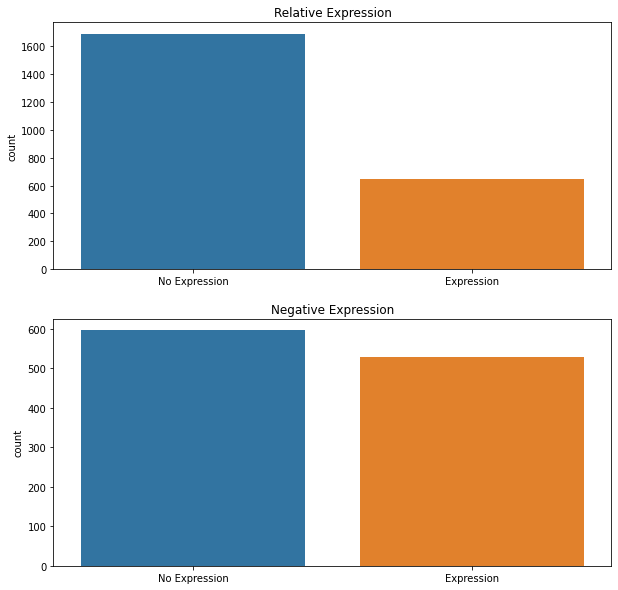

In [8]:
#plot the data
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(relative_y)
plt.title('Relative Expression')
set0 = "No Expression"
set1 = "Expression"
plt.xticks([0,1], [set0,set1])
plt.subplot(2,1,2)
sns.countplot(negative_y)
plt.title('Negative Expression')
plt.xticks([0,1], [set0,set1])
plt.show()

Train on expression from User A

In [9]:
kf = KFold(n_splits=10,shuffle=True,random_state=42)
kf.get_n_splits(relative_x)
UserA_R_KnnModel = KnnClassification_Method(3)

Confusion Matrix


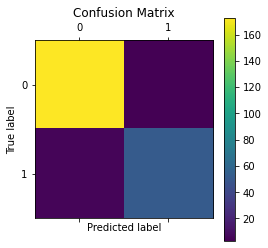

[[173   3]
 [  5  52]]
Accuracy:  0.9656652360515021
Confusion Matrix


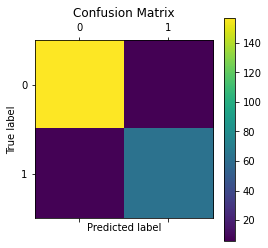

[[157   6]
 [  7  63]]
Accuracy:  0.944206008583691
Confusion Matrix


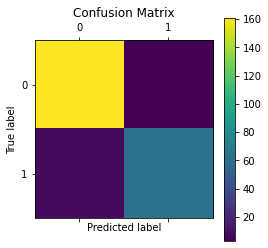

[[161   3]
 [  7  62]]
Accuracy:  0.9570815450643777
Confusion Matrix


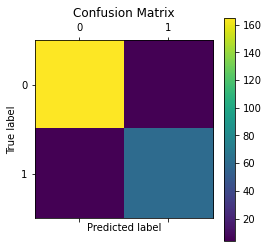

[[165   4]
 [  4  60]]
Accuracy:  0.9656652360515021
Confusion Matrix


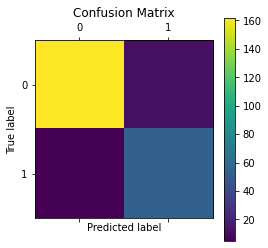

[[162  12]
 [  5  54]]
Accuracy:  0.927038626609442
Confusion Matrix


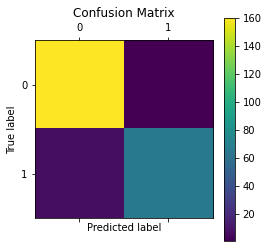

[[160   1]
 [  7  65]]
Accuracy:  0.9656652360515021
Confusion Matrix


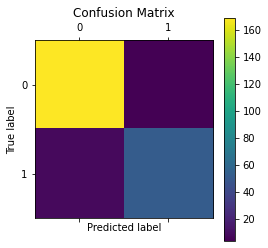

[[169   4]
 [  8  52]]
Accuracy:  0.9484978540772532
Confusion Matrix


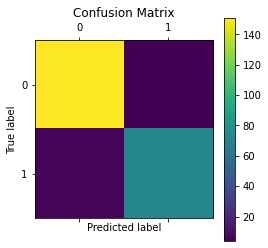

[[151   4]
 [  6  72]]
Accuracy:  0.9570815450643777
Confusion Matrix


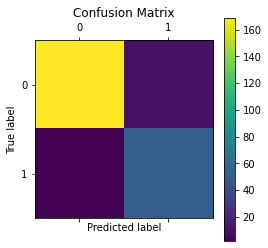

[[169  10]
 [  2  52]]
Accuracy:  0.9484978540772532
Confusion Matrix


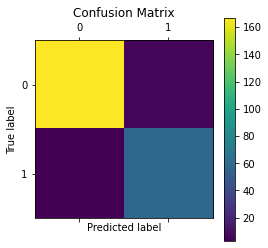

[[167   5]
 [  3  58]]
Accuracy:  0.9656652360515021
Average Accuracy:  0.9545064377682403
Max Accuracy:  0.9656652360515021


In [10]:

Rmax_acc= []
for train_index,test_index in kf.split(relative_x,relative_y):
    relative_x_train,relative_x_test = relative_x[train_index],relative_x[test_index]
    relative_y_train,relative_y_test = relative_y[train_index],relative_y[test_index]
    UserA_R_KnnModel.fit_KnnAlgorithm(relative_x_train,relative_y_train)
    pred_relativeK_A = UserA_R_KnnModel.predict_KnnAlgorithm(relative_x_test)
    acc = accuracy_score(relative_y_test,pred_relativeK_A)
    print("Confusion Matrix")
    print(plot_CM(relative_y_test,pred_relativeK_A))
    print("Accuracy: ",acc)
    Rmax_acc.append(acc)


print("Average Accuracy: ",np.mean(Rmax_acc))
print("Max Accuracy: ",max(Rmax_acc))

Confusion Matrix


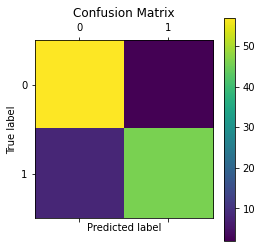

[[57  2]
 [ 8 46]]
Accuracy:  0.911504424778761
Confusion Matrix


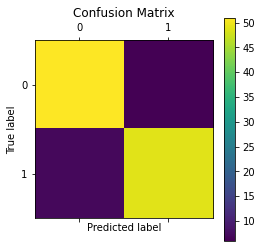

[[51  6]
 [ 7 49]]
Accuracy:  0.8849557522123894
Confusion Matrix


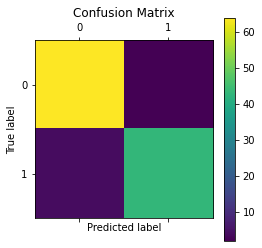

[[64  2]
 [ 4 43]]
Accuracy:  0.9469026548672567
Confusion Matrix


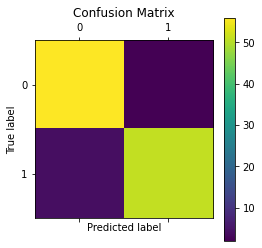

[[56  2]
 [ 4 51]]
Accuracy:  0.9469026548672567
Confusion Matrix


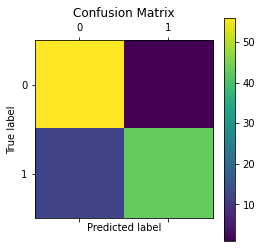

[[56  1]
 [12 43]]
Accuracy:  0.8839285714285714
Confusion Matrix


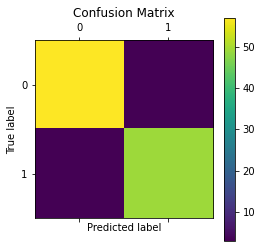

[[57  3]
 [ 3 49]]
Accuracy:  0.9464285714285714
Confusion Matrix


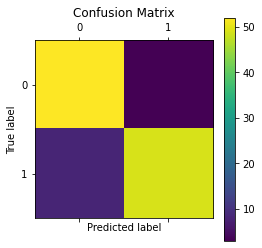

[[52  3]
 [ 8 49]]
Accuracy:  0.9017857142857143
Confusion Matrix


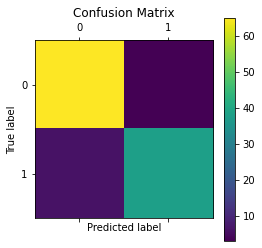

[[65  3]
 [ 6 38]]
Accuracy:  0.9196428571428571
Confusion Matrix


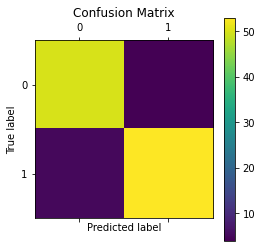

[[50  4]
 [ 5 53]]
Accuracy:  0.9196428571428571
Confusion Matrix


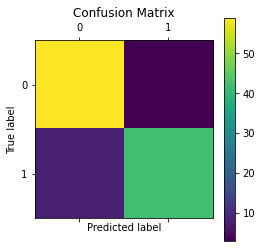

[[59  3]
 [ 8 42]]
Accuracy:  0.9017857142857143
Average Accuracy:  0.9163479772439949
Maximum Accuracy:  0.9469026548672567


In [11]:
UserA_N_KnnModel = KnnClassification_Method(3)
Nmax_acc =[]
for train_index,test_index in kf.split(negative_x,negative_y):
    negative_x_train,negative_x_test = negative_x[train_index],negative_x[test_index]
    negative_y_train,negative_y_test = negative_y[train_index],negative_y[test_index]
    UserA_N_KnnModel.fit_KnnAlgorithm(negative_x_train,negative_y_train)
    pred_negativeK_A = UserA_N_KnnModel.predict_KnnAlgorithm(negative_x_test)
    acc = accuracy_score(negative_y_test,pred_negativeK_A)
    print("Confusion Matrix")
    print(plot_CM(negative_y_test,pred_negativeK_A))
    print("Accuracy: ",acc)
    # add the accuracy to the list
    Nmax_acc.append(acc)

#print the maximum accuracy
print("Average Accuracy: ",np.mean(Nmax_acc))
print("Maximum Accuracy: ",max(Nmax_acc))



Evaluate Accuracy of User A on User B

In [12]:
# Save the user a  relative
pickle.dump(UserA_R_KnnModel,open('UserA_R_KnnModel.sav','wb'))

In [13]:
pickle.dump(UserA_N_KnnModel,open('UserA_N_KnnModel.sav','wb'))

In [14]:
# load in user b data
relative_x_b,relative_y_b = examine_expression(0,'b')
negative_x_b,negative_y_b = examine_expression(1,'b')

In [15]:
# Standardize the Data
relative_x_b = standardize(relative_x_b)
negative_x_b = standardize(negative_x_b)

C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dtibo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


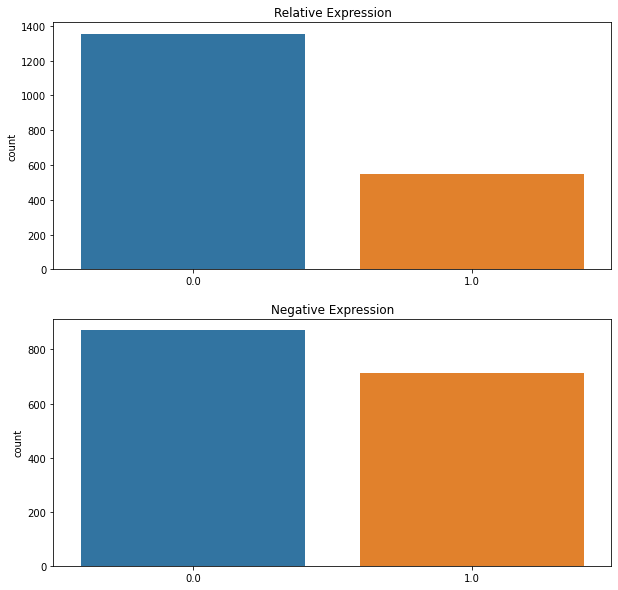

In [16]:
#Plot relative and negative labels
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.countplot(relative_y_b)
plt.title('Relative Expression')
plt.subplot(2,1,2)
sns.countplot(negative_y_b)
plt.title('Negative Expression')
plt.show()


In [17]:
UserA_R_KnnModel = pickle.load(open('UserA_R_KnnModel.sav','rb'))

In [18]:
UserA_N_KnnModel = pickle.load(open('UserA_N_KnnModel.sav','rb'))

In [19]:
for train_index,test_index in kf.split(relative_x_b,relative_y_b):
    relative_x_b_train,relative_x_b_test = relative_x_b[train_index],relative_x_b[test_index]
    relative_y_b_train,relative_y_b_test = relative_y_b[train_index],relative_y_b[test_index]


In [20]:
Relative_AonB_pred = UserA_R_KnnModel.predict_KnnAlgorithm(relative_x_b_test)

In [21]:
Relative_AonB_acc = accuracy_score(relative_y_b_test,Relative_AonB_pred)

In [22]:
for train_index,test_index in kf.split(negative_x_b,negative_y_b):
    negative_x_b_train,negative_x_b_test = negative_x_b[train_index],negative_x_b[test_index]
    negative_y_b_train,negative_y_b_test = negative_y_b[train_index],negative_y_b[test_index]

In [23]:
Negative_AonB_pred = UserA_N_KnnModel.predict_KnnAlgorithm(negative_x_b_test)

In [24]:
Negative_AonB_acc = accuracy_score(negative_y_b_test,Negative_AonB_pred)

In [25]:
print(Relative_AonB_acc)

0.7684210526315789


In [26]:
print(Negative_AonB_acc)

0.5759493670886076


Confusion Matrix for Relative Expression


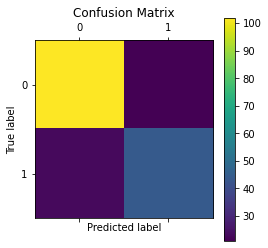

[[102  21]
 [ 23  44]]


In [27]:
# Use other performance metrics
print("Confusion Matrix for Relative Expression")
print(plot_CM(relative_y_b_test,Relative_AonB_pred))

Confusion Matrix for Negative Expression


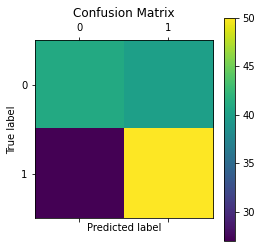

[[41 40]
 [27 50]]


In [28]:
print("Confusion Matrix for Negative Expression")
print(plot_CM(negative_y_b_test,Negative_AonB_pred))

ROC Curve for User A on User B - Relative and Negative


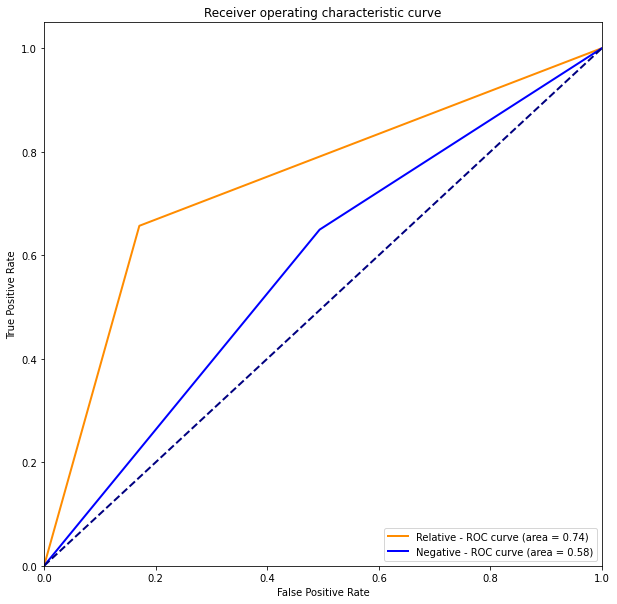

In [29]:
# Plot ROC Curve for User A on User B - Relative
def plot_rocurve(y_test,y_pred,y_test_b,y_pred_b):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # false positive rate, true positive rate for relative
    fpr_b, tpr_b, thresholds_b = roc_curve(y_test_b, y_pred_b) # false positive rate, true positive rate for negative
    roc_auc = auc(fpr, tpr)
    roc_auc_b = auc(fpr_b, tpr_b)
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='Relative - ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr_b, tpr_b, color='blue',
             lw=2, label='Negative - ROC curve (area = %0.2f)' % roc_auc_b)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()



print("ROC Curve for User A on User B - Relative and Negative")
plot_rocurve(relative_y_b_test,Relative_AonB_pred,negative_y_b_test,Negative_AonB_pred)

Precision-Recall Curve for User A on User B - Relative


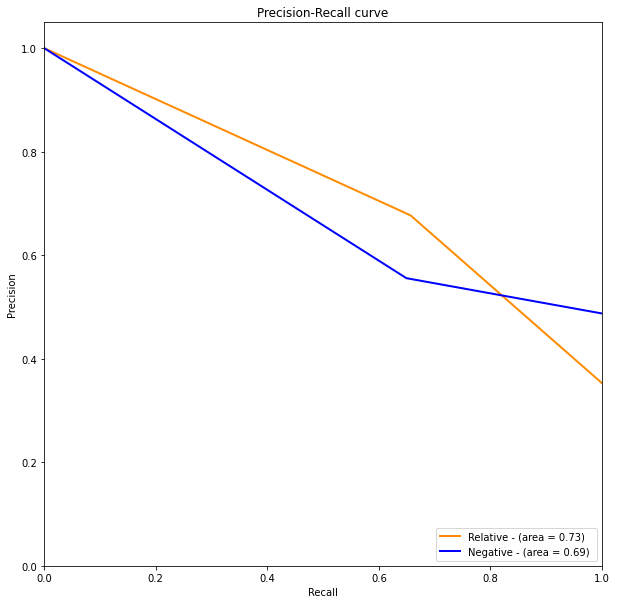

None


In [30]:
def precision_recall(ytest,ypred,ytest_b,ypred_b):
    precision, recall, thresholds = precision_recall_curve(ytest, ypred)
    precision_b, recall_b, thresholds_b = precision_recall_curve(ytest_b, ypred_b)
    auc_precision = auc(recall, precision)
    auc_precision_b = auc(recall_b, precision_b)
    plt.figure(figsize=(10,10))
    plt.plot(recall, precision, color='darkorange',
             lw=2, label='Relative - (area = %0.2f)' % auc_precision)
    plt.plot(recall_b, precision_b, color='blue',
             lw=2, label='Negative - (area = %0.2f) ' % auc_precision_b)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

print("Precision-Recall Curve for User A on User B - Relative")
print(precision_recall(relative_y_b_test,Relative_AonB_pred,negative_y_b_test,Negative_AonB_pred))

Additional Experiments on the first classification Method
Repeat the analysis (training + testing) by inverting the roles of the users
(user B and user A) and comparing the results.

In [31]:
UserB_R_KnnModel = KnnClassification_Method(3)

Confusion Matrix


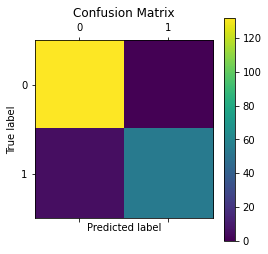

[[132   0]
 [  5  54]]
Accuracy:  0.9738219895287958
Confusion Matrix


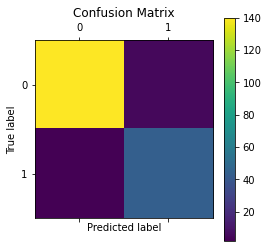

[[140   5]
 [  2  44]]
Accuracy:  0.9633507853403142
Confusion Matrix


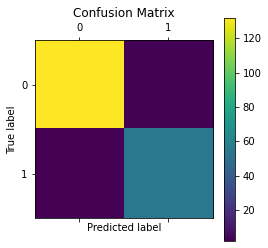

[[132   3]
 [  2  54]]
Accuracy:  0.9738219895287958
Confusion Matrix


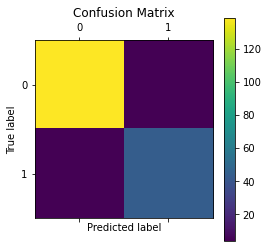

[[139   4]
 [  4  44]]
Accuracy:  0.9581151832460733
Confusion Matrix


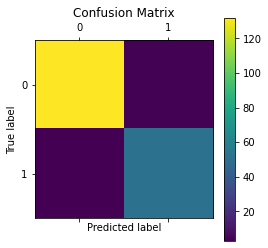

[[132   4]
 [  3  51]]
Accuracy:  0.9631578947368421
Confusion Matrix


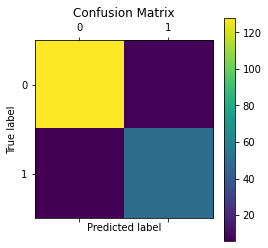

[[128   7]
 [  6  49]]
Accuracy:  0.9315789473684211
Confusion Matrix


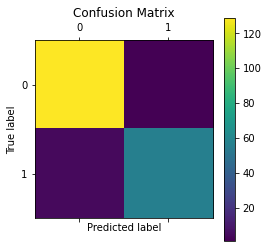

[[129   1]
 [  4  56]]
Accuracy:  0.9736842105263158
Confusion Matrix


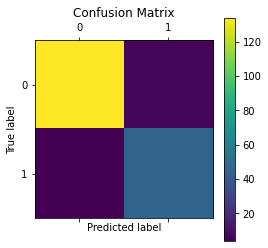

[[134   6]
 [  4  46]]
Accuracy:  0.9473684210526315
Confusion Matrix


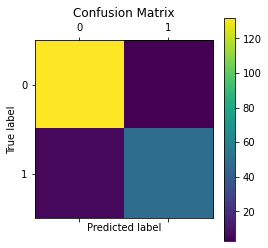

[[132   3]
 [  6  49]]
Accuracy:  0.9526315789473684
Confusion Matrix


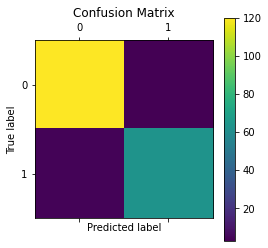

[[120   3]
 [  4  63]]
Accuracy:  0.9631578947368421
Average Accuracy:  0.96006888950124
Maximum Accuracy:  0.9738219895287958


In [32]:
 #  Perform cross validation on the user B expressions
Rmax_acc_b = []
for train_index,test_index in kf.split(relative_x_b,relative_y_b):
    relative_x_b_train,relative_x_b_test = relative_x_b[train_index],relative_x_b[test_index]
    relative_y_b_train,relative_y_b_test = relative_y_b[train_index],relative_y_b[test_index]
    UserB_R_KnnModel.fit_KnnAlgorithm(relative_x_b_train,relative_y_b_train)
    relative_x_b_pred  = UserB_R_KnnModel.predict_KnnAlgorithm(relative_x_b_test)
    relative_b_acc = accuracy_score(relative_y_b_test,relative_x_b_pred)
    print("Confusion Matrix")
    print(plot_CM(relative_y_b_test,relative_x_b_pred))
    print("Accuracy: ",relative_b_acc)
    # add the accuracy to the list
    Rmax_acc_b.append(relative_b_acc)

#print the maximum accuracy
print("Average Accuracy: ",np.mean(Rmax_acc_b))
print("Maximum Accuracy: ",max(Rmax_acc_b))




In [33]:
UserB_N_KnnModel = KnnClassification_Method(3)

Confusion Matrix


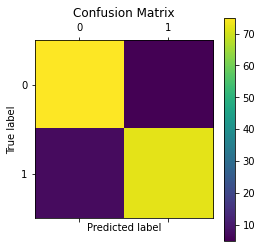

[[75  5]
 [ 7 72]]
Accuracy:  0.9245283018867925
Confusion Matrix


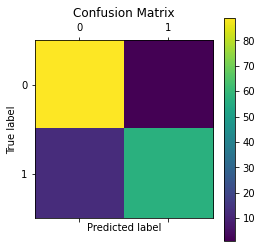

[[89  1]
 [12 57]]
Accuracy:  0.9182389937106918
Confusion Matrix


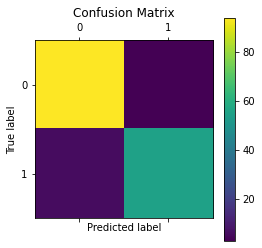

[[94  3]
 [ 6 55]]
Accuracy:  0.9430379746835443
Confusion Matrix


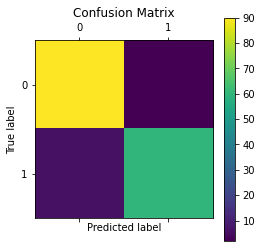

[[90  2]
 [ 6 60]]
Accuracy:  0.9493670886075949
Confusion Matrix


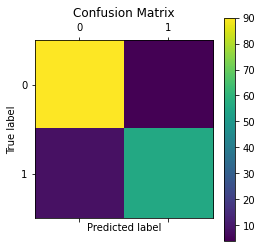

[[90  4]
 [ 8 56]]
Accuracy:  0.9240506329113924
Confusion Matrix


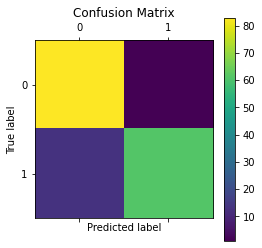

[[83  1]
 [13 61]]
Accuracy:  0.9113924050632911
Confusion Matrix


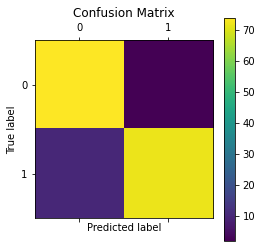

[[74  2]
 [10 72]]
Accuracy:  0.9240506329113924
Confusion Matrix


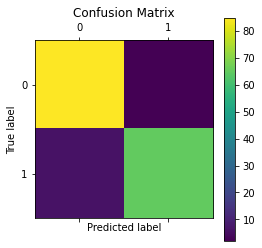

[[85  2]
 [ 6 65]]
Accuracy:  0.9493670886075949
Confusion Matrix


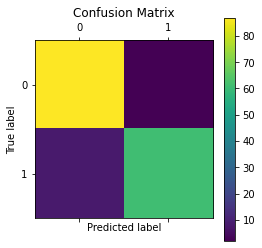

[[87  2]
 [ 8 61]]
Accuracy:  0.9367088607594937
Confusion Matrix


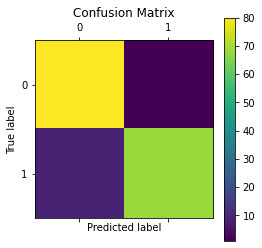

[[80  1]
 [ 9 68]]
Accuracy:  0.9367088607594937
Average Accuracy:  0.9317450839901282
Maximum Accuracy:  0.9493670886075949


In [34]:
 #  Perform cross validation on the user B expressions
Nmax_acc_b = []
for train_index,test_index in kf.split(negative_x_b , negative_y_b):
    negative_x_b_train,negative_x_b_test = negative_x_b[train_index],negative_x_b[test_index]
    negative_y_b_train,negative_y_b_test = negative_y_b[train_index],negative_y_b[test_index]
    UserB_N_KnnModel.fit_KnnAlgorithm(negative_x_b_train,negative_y_b_train)
    negative_x_b_pred  = UserB_N_KnnModel.predict_KnnAlgorithm(negative_x_b_test)
    negative_b_acc = accuracy_score(negative_y_b_test,negative_x_b_pred)
    print("Confusion Matrix")
    print(plot_CM(negative_y_b_test,negative_x_b_pred))
    print("Accuracy: ",negative_b_acc)
    # add the accuracy to the list
    Nmax_acc_b .append(negative_b_acc)


#print the maximum accuracy
print("Average Accuracy: ",np.mean(Nmax_acc_b))
print("Maximum Accuracy: ",max(Nmax_acc_b))

In [35]:
# Save the model
pickle.dump(UserB_R_KnnModel, open("UserB_R_KnnModel.sav", 'wb'))
pickle.dump(UserB_N_KnnModel, open("UserB_N_KnnModel.sav", 'wb'))

In [36]:
UserB_R_KnnModel = pickle.load(open("UserB_R_KnnModel.sav", 'rb'))
UserB_N_KnnModel = pickle.load(open("UserB_N_KnnModel.sav", 'rb'))

In [37]:
for train_index, test_index in kf.split(relative_x, relative_y):
    relative_x_train, relative_x_test = relative_x[train_index], relative_x[test_index]
    relative_y_train, relative_y_test = relative_y[train_index], relative_y[test_index]


In [38]:
#  Perform cross validation on the user A expressions
for train_index,test_index in kf.split(negative_x,negative_y):
    negative_x_train,negative_x_test = negative_x[train_index],negative_x[test_index]
    negative_y_train,negative_y_test = negative_y[train_index],negative_y[test_index]


In [39]:
Relative_BonA_pred = UserB_R_KnnModel.predict_KnnAlgorithm(relative_x_test)
Negative_BonA_pred = UserB_N_KnnModel.predict_KnnAlgorithm(negative_x_test)

In [40]:
Relative_BonA_acc = accuracy_score(relative_y_test,Relative_BonA_pred)
Negative_BonA_acc = accuracy_score(negative_y_test,Negative_BonA_pred)

In [41]:
print("Relative_BonA_acc: ",Relative_BonA_acc)
print("Negative_BonA_acc: ",Negative_BonA_acc)

Relative_BonA_acc:  0.7682403433476395
Negative_BonA_acc:  0.6607142857142857


Confusion Matrix


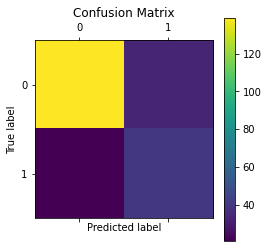

[[139  33]
 [ 21  40]]


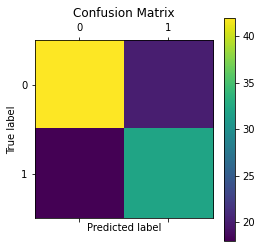

[[42 20]
 [18 32]]


In [42]:
# Confusion Matrix
print("Confusion Matrix")
print(plot_CM(relative_y_test,Relative_BonA_pred))
print(plot_CM(negative_y_test,Negative_BonA_pred))

ROC Curve


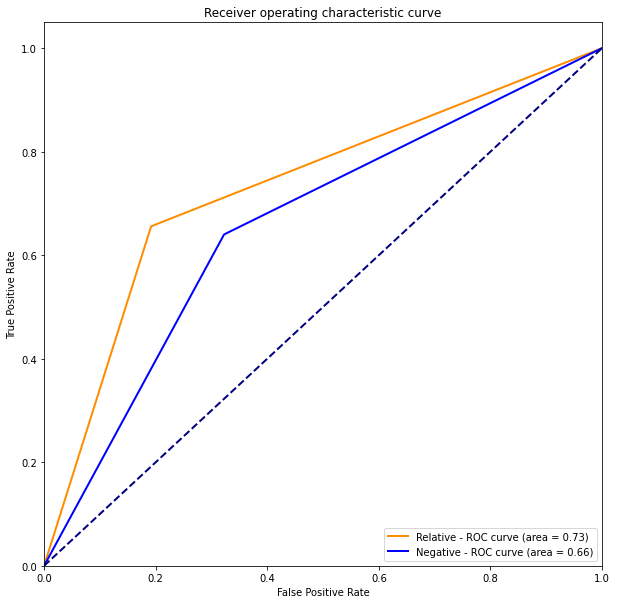

None


In [43]:
# ROCCURVE
print("ROC Curve")
print(plot_rocurve(relative_y_test,Relative_BonA_pred,negative_y_test,Negative_BonA_pred))

Precision-Recall Curve


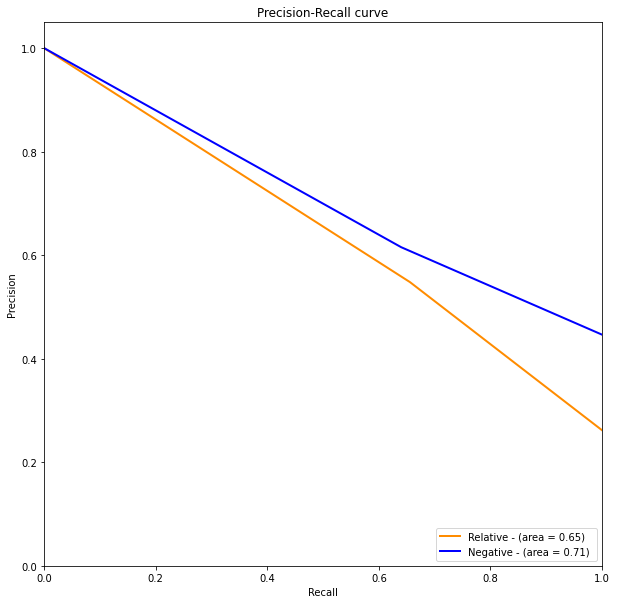

None


In [44]:
# Precision-Recall Curve
print("Precision-Recall Curve")
print(precision_recall(relative_y_test,Relative_BonA_pred,negative_y_test,Negative_BonA_pred))

Repeat the analysis (training + testing) by using a different feature representation
(eg. Using the PCA method) and comparing the results.

In [45]:
# load in user b data
new_relative_x_b,new_relative_y_b = examine_expression(0,'b')
new_negative_x_b,new_negative_y_b = examine_expression(1,'b')

In [46]:
# Standardize the data
new_relative_x_b_std = standardize(new_relative_x_b)
new_negative_x_b_std = standardize(new_negative_x_b)

In [116]:
PCAKNNModel_R = KnnClassification_Method(3)

Confusion Matrix


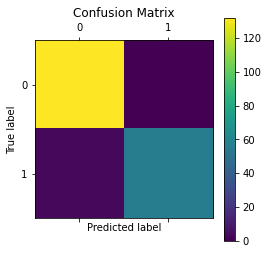

[[132   0]
 [  3  56]]
0.9842931937172775
Confusion Matrix


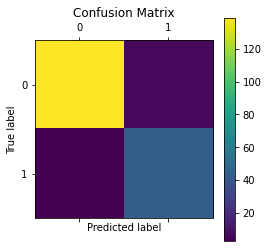

[[139   6]
 [  3  43]]
0.9528795811518325
Confusion Matrix


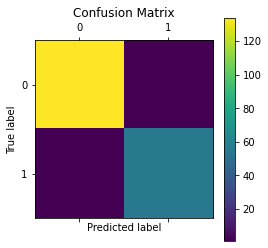

[[134   1]
 [  1  55]]
0.9895287958115183
Confusion Matrix


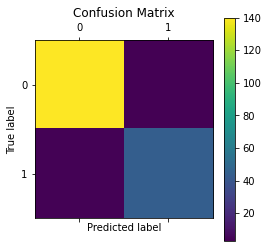

[[140   3]
 [  4  44]]
0.9633507853403142
Confusion Matrix


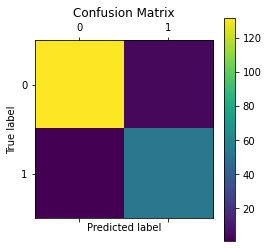

[[132   4]
 [  1  53]]
0.9736842105263158
Confusion Matrix


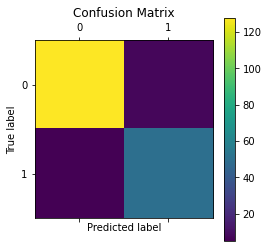

[[128   7]
 [  5  50]]
0.9368421052631579
Confusion Matrix


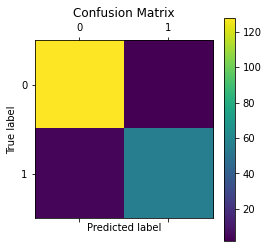

[[128   2]
 [  4  56]]
0.968421052631579
Confusion Matrix


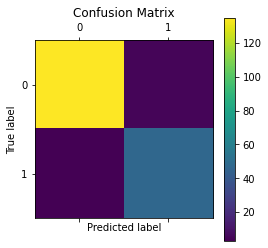

[[135   5]
 [  3  47]]
0.9578947368421052
Confusion Matrix


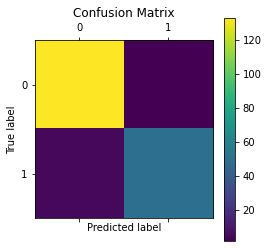

[[133   2]
 [  5  50]]
0.9631578947368421
Confusion Matrix


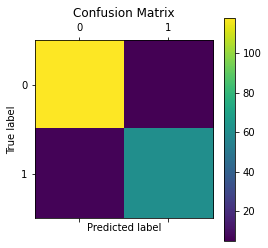

[[118   5]
 [  6  61]]
0.9421052631578948
Maximum Accuracy:  0.9895287958115183
Average Accuracy:  0.9632157619178837


In [117]:
pca_rmax = []
for train_index,test_index in kf.split(new_relative_x_b_std,new_relative_y_b):
    new_relative_x_b_std_train,new_relative_x_b_std_test = new_relative_x_b_std[train_index],new_relative_x_b_std[test_index]
    new_relative_y_b_train,new_relative_y_b_test = new_relative_y_b[train_index],new_relative_y_b[test_index]
    pca = PCA(n_components=43)
    pca.fit(new_relative_x_b_std_train)
    new_relative_x_b_std_train_pca = pca.transform(new_relative_x_b_std_train)
    new_relative_x_b_std_test_pca = pca.transform(new_relative_x_b_std_test)
    PCAKNNModel_R.fit_KnnAlgorithm(new_relative_x_b_std_train_pca,new_relative_y_b_train)
    new_relative_y_b_pred = PCAKNNModel_R.predict_KnnAlgorithm(new_relative_x_b_std_test_pca)
    new_relative_y_b_acc = accuracy_score(new_relative_y_b_test,new_relative_y_b_pred)
    print("Confusion Matrix")
    print(plot_CM(new_relative_y_b_test,new_relative_y_b_pred))
    print(new_relative_y_b_acc)
    pca_rmax.append(new_relative_y_b_acc)

print("Maximum Accuracy: ",max(pca_rmax))

print("Average Accuracy: ",np.mean(pca_rmax))

In [158]:
PCAKNNModel_N = KnnClassification_Method(1)

Confusion Matrix


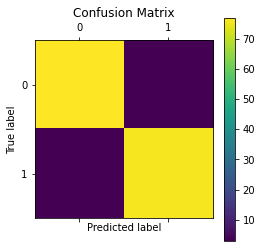

[[77  3]
 [ 3 76]]
0.9622641509433962
Confusion Matrix


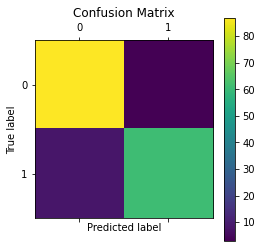

[[87  3]
 [ 8 61]]
0.9308176100628931
Confusion Matrix


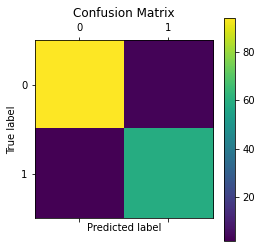

[[94  3]
 [ 2 59]]
0.9683544303797469
Confusion Matrix


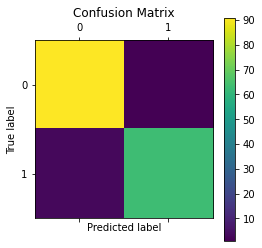

[[91  1]
 [ 3 63]]
0.9746835443037974
Confusion Matrix


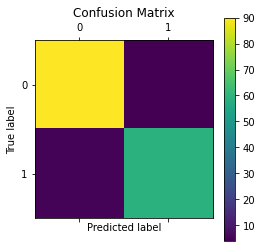

[[90  4]
 [ 5 59]]
0.9430379746835443
Confusion Matrix


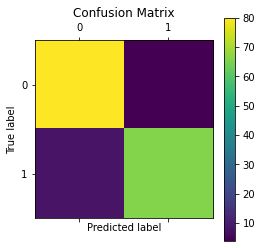

[[80  4]
 [ 8 66]]
0.9240506329113924
Confusion Matrix


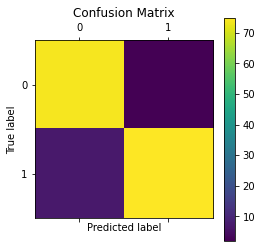

[[74  2]
 [ 7 75]]
0.9430379746835443
Confusion Matrix


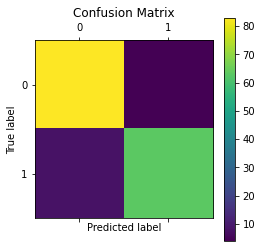

[[83  4]
 [ 8 63]]
0.9240506329113924
Confusion Matrix


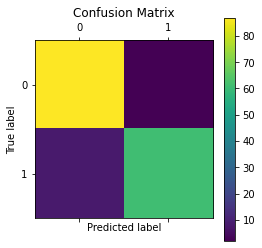

[[87  2]
 [ 8 61]]
0.9367088607594937
Confusion Matrix


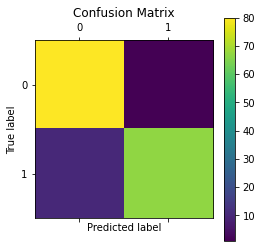

[[80  1]
 [10 67]]
0.930379746835443
Maximum Accuracy:  0.9746835443037974
Average Accuracy:  0.9437385558474645


In [159]:
pca_nmaX = []
for train_index,test_index in kf.split(new_negative_x_b_std,new_negative_y_b):
    new_negative_x_b_std_train,new_negative_x_b_std_test = new_negative_x_b_std[train_index],new_negative_x_b_std[test_index]
    new_negative_y_b_train,new_negative_y_b_test = new_negative_y_b[train_index],new_negative_y_b[test_index]
    pca = PCA(n_components=10)
    pca.fit(new_negative_x_b_std_train)
    new_negative_x_b_std_train_pca = pca.transform(new_negative_x_b_std_train)
    new_negative_x_b_std_test_pca = pca.transform(new_negative_x_b_std_test)
    PCAKNNModel_N.fit_KnnAlgorithm(new_negative_x_b_std_train_pca,new_negative_y_b_train)
    new_negative_y_b_pred = PCAKNNModel_N.predict_KnnAlgorithm(new_negative_x_b_std_test_pca)
    new_negative_y_b_acc = accuracy_score(new_negative_y_b_test,new_negative_y_b_pred)
    print("Confusion Matrix")
    print(plot_CM(new_negative_y_b_test,new_negative_y_b_pred))
    print(new_negative_y_b_acc)
    pca_nmaX.append(new_negative_y_b_acc)


print("Maximum Accuracy: ",max(pca_nmaX))
print("Average Accuracy: ",np.mean(pca_nmaX))

In [160]:
pickle.dump(PCAKNNModel_R, open("PCAKNNModel_R.sav", 'wb'))

In [161]:
PCAKNNModel_R = pickle.load(open("PCAKNNModel_R.sav", 'rb'))

In [162]:
pickle.dump(PCAKNNModel_N, open("PCAKNNModel_N.sav", 'wb'))


In [163]:
PCAKNNModel_N = pickle.load(open("PCAKNNModel_N.sav", 'rb'))

In [164]:
# load in user a data expressions
new_relative_x_a,new_relative_y_a = examine_expression(0,'a')
new_negative_x_a,new_negative_y_a = examine_expression(1,'a')

In [165]:
# Standardize the data
new_relative_x_a_std = standardize(new_relative_x_a)
new_negative_x_a_std = standardize(new_negative_x_a)

In [166]:
for train_index,test_index in kf.split(new_relative_x_a_std,new_relative_y_a):
    new_relative_x_a_std_train,new_relative_x_a_std_test = new_relative_x_a_std[train_index],new_relative_x_a_std[test_index]
    new_relative_y_a_train,new_relative_y_a_test = new_relative_y_a[train_index],new_relative_y_a[test_index]
    pca = PCA(n_components=43)
    pca.fit(new_relative_x_a_std_train)
    new_relative_x_b_std_train_pca = pca.transform(new_relative_x_a_std_train)
    new_relative_x_b_std_test_pca = pca.transform(new_relative_x_a_std_test)

In [167]:
PCA_RBA = PCAKNNModel_R.predict_KnnAlgorithm(new_relative_x_b_std_test_pca)
PCA_RBA_acc = accuracy_score(new_relative_y_a_test,PCA_RBA)

Confusion Matrix


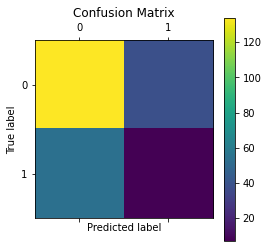

[[134  38]
 [ 54   7]]


In [168]:
print("Confusion Matrix")
print(plot_CM(new_relative_y_a_test,PCA_RBA))

In [169]:
print(PCA_RBA_acc)

0.6051502145922747


In [170]:
for train_index,test_index in kf.split(new_negative_x_a_std,new_negative_y_a):
    new_negative_x_a_std_train,new_negative_x_a_std_test = new_negative_x_a_std[train_index],new_negative_x_a_std[test_index]
    new_negative_y_a_train,new_negative_y_a_test = new_negative_y_a[train_index],new_negative_y_a[test_index]
    pca = PCA(n_components=10)
    pca.fit(new_negative_x_a_std_train)
    new_negative_x_b_std_train_pca = pca.transform(new_negative_x_a_std_train)
    new_negative_x_b_std_test_pca = pca.transform(new_negative_x_a_std_test)

In [171]:
PCA_NBA = PCAKNNModel_N.predict_KnnAlgorithm(new_negative_x_b_std_test_pca)

In [172]:
PCA_NBA_acc = accuracy_score(new_negative_y_a_test,PCA_NBA)

Confusion Matrix


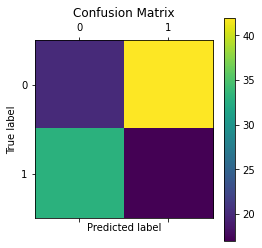

[[20 42]
 [33 17]]


In [173]:
print("Confusion Matrix")
print(plot_CM(new_negative_y_a_test,PCA_NBA))

In [174]:
print(PCA_NBA_acc)

0.33035714285714285


Choose a different classifier than before, and repeat the training and testing [30%],
broken down into: